<p> 
Generating permutation replicates:

As discussed in the video, a permutation replicate is a single value of a statistic computed from a permutation sample. As the draw_bs_reps() function you wrote in chapter 2 is useful for you to generate bootstrap replicates, it is useful to have a similar function, draw_perm_reps(), to generate permutation replicates. You will write this useful function in this exercise.

The function has call signature draw_perm_reps(data_1, data_2, func, size=1). Importantly, func must be a function that takes two arrays as arguments. In most circumstances, func will be a function you write yourself.

</p>

<p> 

- Define a function with this signature: draw_perm_reps(data_1, data_2, func, size=1).
    - Initialize an array to hold the permutation replicates using np.empty().
    - Write a for loop to:
        - Compute a permutation sample using your permutation_sample() function
        - Pass the samples into func() to compute the replicate and store the result in your array of replicates.
        - Return the array of replicates.

</p>

In [ ]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

<p> 

Look before you leap: EDA before hypothesis testing:

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a pandas DataFrame, df, where column ID is the identity of the frog and column impact_force is the impact force in Newtons (N).

</p>

<p> 

- Use sns.swarmplot() to make a bee swarm plot of the data by specifying the x, y, and data keyword arguments.
- Label your axes.
- Show the plot.

</p>

In [ ]:
# Make bee swarm plot
_ = sns.swarmplot(x= "ID", y= "impact_force", data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

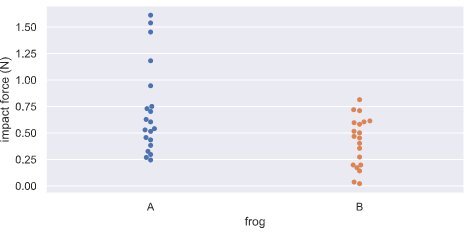

<p> 

Permutation test on frog data:

The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

For your convenience, the data has been stored in the arrays force_a and force_b.

</p>

<p> 

- Define a function with call signature diff_of_means(data_1, data_2) that returns the differences in means between two data sets, mean of data_1 minus mean of data_2.
- Use this function to compute the empirical difference of means that was observed in the frogs.
- Draw 10,000 permutation replicates of the difference of means.
- Compute the p-value.
- Print the p-value.

</p>

In [ ]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

#correct output:
p-value = 0.0063